<div dir="rtl" style="text-align: right;">
<h2> بازی زندگی (رویکرد NumPy)</h2>

<p>شمارش همسایه‌ها نسبتاً آسان است اگر به یاد داشته باشیم که ما یک مرز خنثی دور میدان اضافه کردیم. با در نظر گرفتن دیدگاه‌های جزئی از میدان، ما می‌توانیم به طور شهودی به همسایه‌ها دسترسی پیدا کنیم که در زیر برای مورد یک‌بعدی نشان داده شده است:</p>

<pre dir="ltr" style="text-align: left;">
               ┏━━━┳━━━┳━━━┓───┬───┐
        Z[:-2] ┃ 0 ┃ 1 ┃ 1 ┃ 1 │ 0 │ (همسایه‌های چپ)
               ┗━━━┻━━━┻━━━┛───┴───┘
                     ↓︎
           ┌───┏━━━┳━━━┳━━━┓───┐
   Z[1:-1] │ 0 ┃ 1 ┃ 1 ┃ 1 ┃ 0 │ (سلول‌های واقعی)
           └───┗━━━┻━━━┻━━━┛───┘
                     ↑
       ┌───┬───┏━━━┳━━━┳━━━┓
Z[+2:] │ 0 │ 1 ┃ 1 ┃ 1 ┃ 0 ┃ (همسایه‌های راست)
       └───┴───┗━━━┻━━━┻━━━┛
</pre>

<p>رفتن به مورد دو بعدی فقط کمی حساب و کتاب نیاز دارد تا مطمئن شویم که همه هشت همسایه را در نظر گرفته‌ایم.</p>
</div>


In [2]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

<div dir="rtl" style="text-align: right;">



<p>حتی اگر کد فوق از حلقه‌های تودرتو استفاده نمی‌کند، به دلیل استفاده از چهار فراخوانی <code>argwhere</code>، بسیار دور از بهینه است و سرعت پایینی دارد. در عوض، می‌توانیم قوانین را به سلول‌هایی که زنده می‌مانند (در حالت 1 باقی می‌مانند) و سلول‌هایی که تولد می‌یابند تقسیم‌بندی کنیم. برای این کار، می‌توانیم از توانایی‌های بولی نامپای استفاده کرده و به طور طبیعی بنویسیم:</p>

<p>توجه: در کد بالا ما <code>Z = 0</code> را ننوشتیم زیرا این فقط مقدار 0 را به Z اختصاص می‌دهد که سپس به یک اسکالر ساده تبدیل می‌شود.</p>
</div>


In [3]:
# صاف کردن آرایه‌ها
N_ = N.ravel() # یک آرایه یک بعدی N_ ایجاد کنید
Z_ = Z.ravel() # یک آرایه یک بعدی Z_ ایجاد کنید

# اعمال قوانین
R1 = np.argwhere( (Z_==1) & (N_ < 2) )  # شناسایی سلول‌های فعال با کمتر از ۲ همسایه
R2 = np.argwhere( (Z_==1) & (N_ > 3) )  # شناسایی سلول‌های فعال با بیشتر از ۳ همسایه
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )  # شناسایی سلول‌های فعال با ۲ یا ۳ همسایه
R4 = np.argwhere( (Z_==0) & (N_==3) )  # شناسایی سلول‌های غیرفعال با دقیقاً ۳ همسایه

# تنظیم مقادیر جدید
Z_[R1] = 0  # سلول‌های فعال با کمتر از ۲ همسایه غیرفعال می‌شوند
Z_[R2] = 0  # سلول‌های فعال با بیشتر از ۳ همسایه غیرفعال می‌شوند
Z_[R3] = Z_[R3]  # سلول‌های فعال با ۲ یا ۳ همسایه بدون تغییر می‌مانند
Z_[R4] = 1  # سلول‌های غیرفعال با دقیقاً ۳ همسایه فعال می‌شوند

# مطمئن شوید که حاشیه‌ها خالی می‌مانند
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0  # حاشیه‌ها را خالی نگه دارید


<div dir="rtl" style="text-align: right;">



<p>حتی اگر کد فوق از حلقه‌های تودرتو استفاده نکند به دلیل استفاده از چهار فراخوانی <code>argwhere</code>، بسیار غیربهینه است و سرعت پایینی دارد. در عوض، می‌توانیم قوانین را به سلول‌هایی که زنده می‌مانند (در حالت 1 باقی می‌مانند) و سلول‌هایی که تولد می‌یابند تقسیم‌بندی کنیم. برای این کار، می‌توانیم از  
bolean
 نامپای استفاده کرده و به طور طبیعی بنویسیم:</p>

<p>توجه: در کد بالا ما <code>Z = 0</code> را ننوشتیم زیرا این فقط مقدار 0 را به Z اختصاص می‌دهد که سپس به یک اسکالر ساده تبدیل می‌شود.</p>
</div>


In [4]:
# تعیین وضعیت فعال برای تولد سلول‌ها
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0) # حالت فعال برای سلول‌های جدید (تولد)

# تعیین حالت‌های بقاء برای سلول‌های فعال
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1) # حالت‌های غیرفعال برای سلول‌هایی که باید بقاء پیدا کنند

# تنظیم مجدد کل شبکه به حالت غیرفعال
Z[...] = 0

# فعال سازی سلول‌هایی که باید تولد یا بقاء پیدا کنند
Z[1:-1,1:-1][birth | survive] = 1


<div dir="rtl" style="text-align: right;">

<p>اگر به خطوط تولد و بقا نگاه کنید، خواهید دید که این دو متغیر آرایه‌هایی هستند که می‌توانند برای تنظیم مقادیر Z به 1 پس از پاک کردن آن استفاده شوند.</p>
<h3>راه‌حل کامل</h3>


<p>بازی زندگی. سطوح خاکستری نشان‌دهنده میزان فعالیت یک سلول در گذشته است.</p>

<p>در زیر راه‌حل کاملی آورده شده که با استفاده از رویکرد NumPy پیاده‌سازی شده است.</p>
</div>


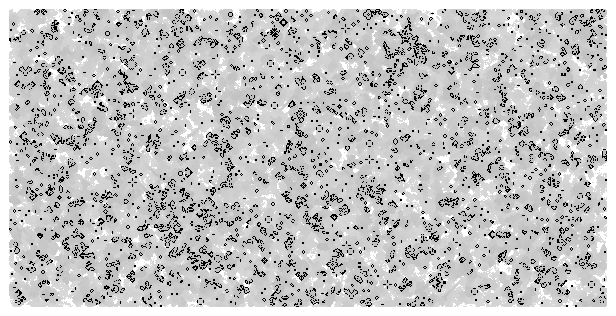

In [5]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(*args):
    global Z, M

    # محاسبه تعداد همسایگان
    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)  # شرایط تولد
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)  # شرایط بقا
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # نمایش فعالیت‌های گذشته
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # فعالیت مستقیم
    # M[...] = Z
    im.set_data(M)

# تصادفی اولیه زمینه
Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim = animation.FuncAnimation(fig, update, interval=10, frames=100)
anim.save('statics/img/08_04_Game of LifeVideo .mp4', writer=writer)
plt.show()


<div dir="rtl" style="text-align: right;">
<h3>خروجی:</h3>
<p>خروجی این کد به شکل زیر خواهد بود. انیمیشن زیر به شما کمک می‌کند تا بازی زندگی را تجسم کنید:</p>


<video width="1280" height="720" autoplay alt="Game of Life Video" controls loop>
    <source src="statics/img/08_04_Game of LifeVideo .mp4" type="video/mp4">
</video>

</div>